In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv('C:\\Users\\SMART\\Downloads\\spam.csv', encoding = "ISO-8859-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1547,ham,Bishan lar nearer... No need buy so early cos ...,NaN,NaN,NaN
2929,ham,Wat's my dear doing? Sleeping ah?,NaN,NaN,NaN
535,ham,"Good afternoon, my love! How goes that day ? I...",NaN,NaN,NaN
5022,ham,Anyway holla at me whenever you're around beca...,NaN,NaN,NaN
1347,ham,She doesnt need any test.,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [7]:
df.sample(5)

,v1,v2
5500,ham,Love has one law; Make happy the person you lo...
696,ham,"Aight, you close by or still down around alex'..."
5266,ham,HI DARLIN ITS KATE ARE U UP FOR DOIN SOMETHIN ...
3143,ham,"Haha I heard that, text me when you're around"
1308,ham,I jokin oni lar.. ÌÏ busy then i wun disturb Ì_.


In [8]:
df.rename(columns = {'v1':'target','v2':'text'}, inplace = True)
df.sample(5)

,target,text
2748,ham,Send his number and give reply tomorrow mornin...
534,ham,I've not called you in a while. This is hoping...
140,ham,"K, text me when you're on the way"
4128,ham,Me i'm not workin. Once i get job...
1982,ham,Hey i will be late... i'm at amk. Need to drin...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df = df.drop_duplicates(keep = 'first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

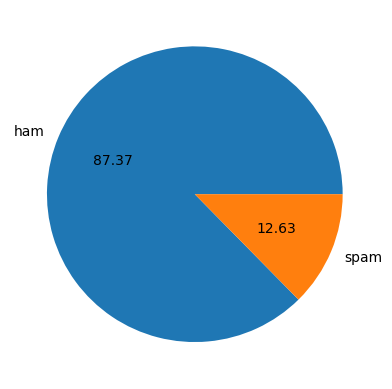

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham','spam'], autopct = "%0.2f")
plt.show()

In [20]:
import nltk 

In [21]:
!pip install nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SMART\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

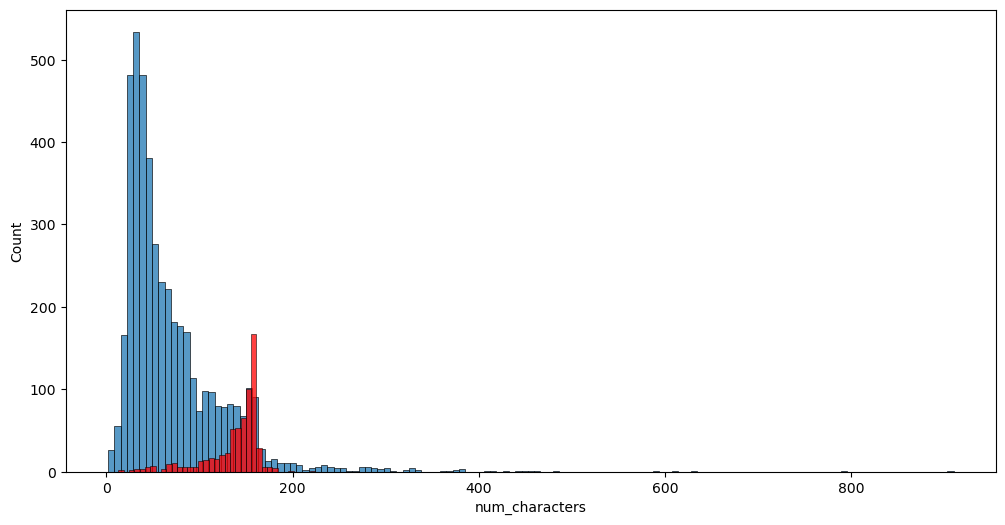

In [33]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] ==0]['num_characters'])
sns.histplot(df[df['target'] ==1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

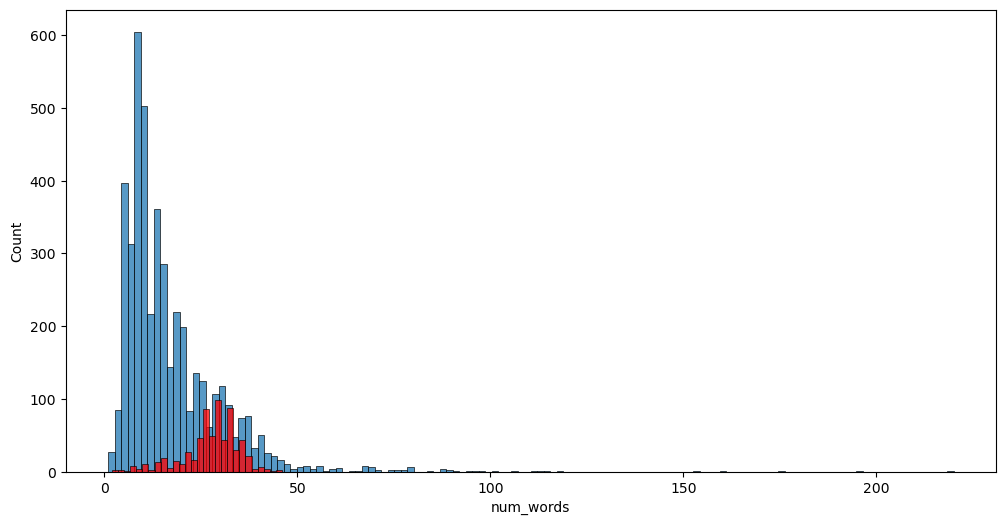

In [34]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] ==0]['num_words'])
sns.histplot(df[df['target'] ==1]['num_words'],color = 'red')

C:\Users\SMART\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


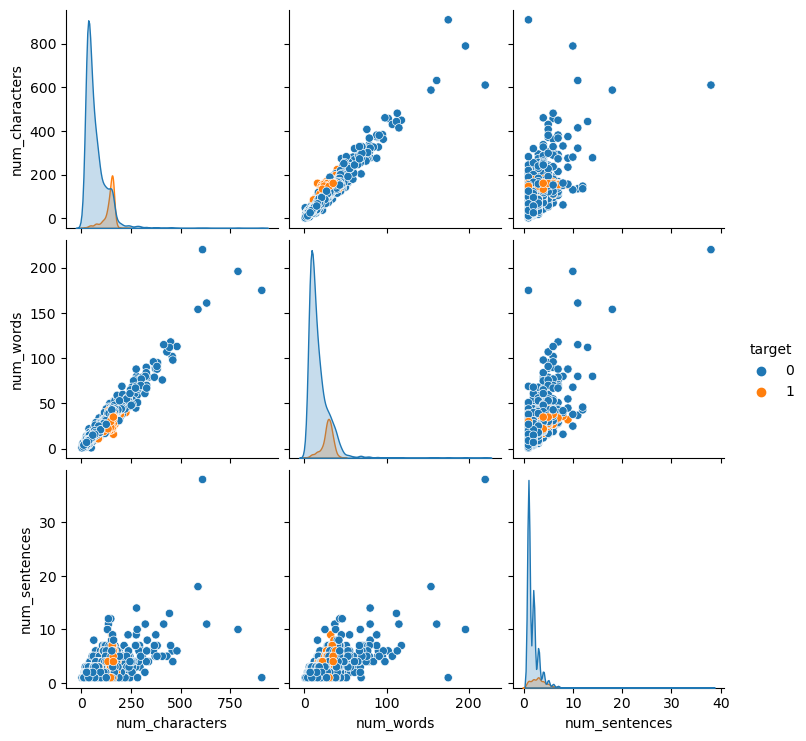

In [35]:
sns.pairplot(df,hue = 'target')

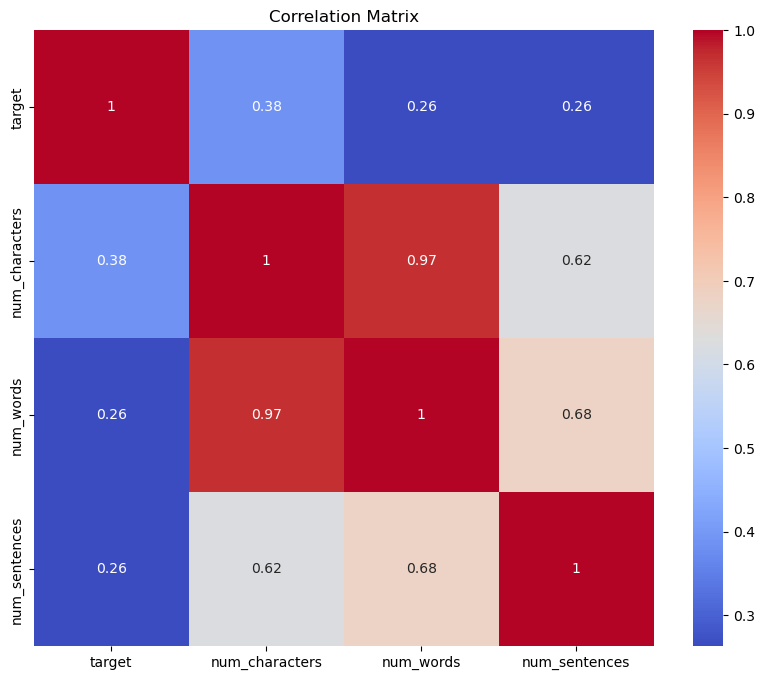

In [36]:
correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentences']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# DATA PREPROCESSING

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SMART\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

def transform_text(text):
    y = []
    ps = PorterStemmer()
    words = nltk.word_tokenize(text)
    
    for word in words:
        if word not in stopwords.words('english') and word not in string.punctuation:
            stemmed_word = ps.stem(word)
            y.append(stemmed_word)
    return y

text = "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."
result = transform_text(text)
print(result)

['i', "'m", 'gon', 'na', 'home', 'soon', "n't", 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'i', "'ve", 'cri', 'enough', 'today']


In [39]:
df['text'][25]

"Just forced myself to eat a slice. I'm really not hungry tho. This sucks. Mark is getting worried. He knows I'm sick when I turn down pizza. Lol"

In [40]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [41]:
df['transformed_text'] = df['text'].apply(transform_text)

In [42]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, .., avail, bugi, n,..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, ..., joke, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, ..., u, c, alreadi, ..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, i, n't, think, goe, usf, live, around, t..."


In [44]:
pip install Wordcloud

  Obtaining dependency information for Wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 495.5 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/300.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [46]:
filtered_df = df[df['target'] == 1]

filtered_df['transformed_text'] = filtered_df['transformed_text'].astype(str).str.strip()

spam_wc = wc.generate(filtered_df['transformed_text'].str.cat(sep = " "))

C:\Users\SMART\AppData\Local\Temp\ipykernel_13680\3806795843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['transformed_text'] = filtered_df['transformed_text'].astype(str).str.strip()


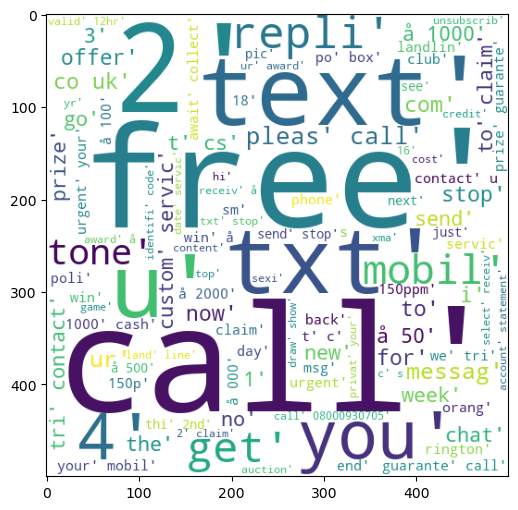

In [47]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [48]:
filtered_df = df[df['target'] == 0]

filtered_df['transformed_text'] = filtered_df['transformed_text'].astype(str).str.strip()

ham_wc = wc.generate(filtered_df['transformed_text'].str.cat(sep = " "))

C:\Users\SMART\AppData\Local\Temp\ipykernel_13680\2165870107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['transformed_text'] = filtered_df['transformed_text'].astype(str).str.strip()


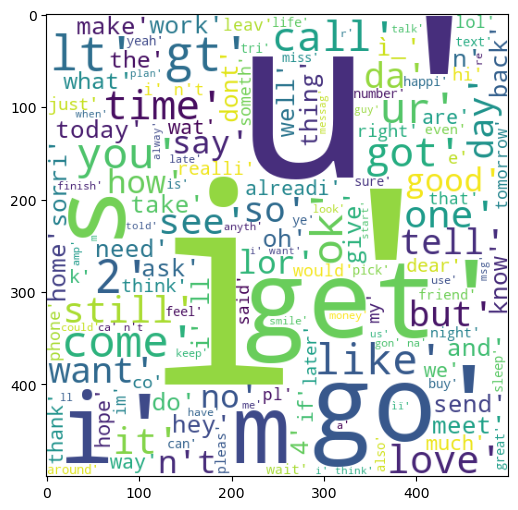

In [49]:
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, .., avail, bugi, n,..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, ..., joke, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, ..., u, c, alreadi, ..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, i, n't, think, goe, usf, live, around, t..."


In [51]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg:
        spam_corpus.append(word)

In [52]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 't',
 'c',
 "'s",
 'appli',
 '08452810075over18',
 "'s",
 'freemsg',
 'hey',
 'darl',
 "'s",
 '3',
 'week',
 "'s",
 'word',
 'back',
 'i',
 "'d",
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'å£1.50',
 'rcv',
 'winner',
 'as',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'å£900',
 'prize',
 'reward',
 'to',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'had',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'the',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 'from',
 '100',
 '20,000',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '150p/day',
 '6day',
 '16+',
 'tsandc',
 'appli',
 're

In [53]:
len(spam_corpus)

11911

In [54]:
from collections import Counter

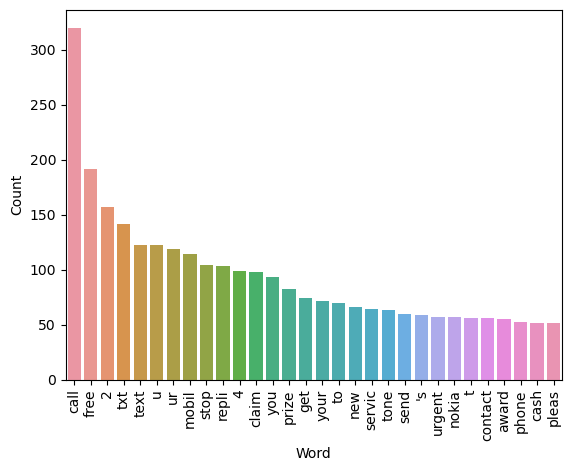

In [55]:
spam_counter = Counter(spam_corpus)
most_common_30 = spam_counter.most_common(30)
df1 = pd.DataFrame(most_common_30, columns = ['Word', 'Count'])

sns.barplot(x = 'Word', y = 'Count', data = df1)
plt.xticks(rotation = 'vertical')
plt.show()

In [56]:
ham_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg:
        ham_corpus.append(word)

In [57]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'transformed_text'],
      dtype='object')

In [58]:
len(ham_corpus)

11911

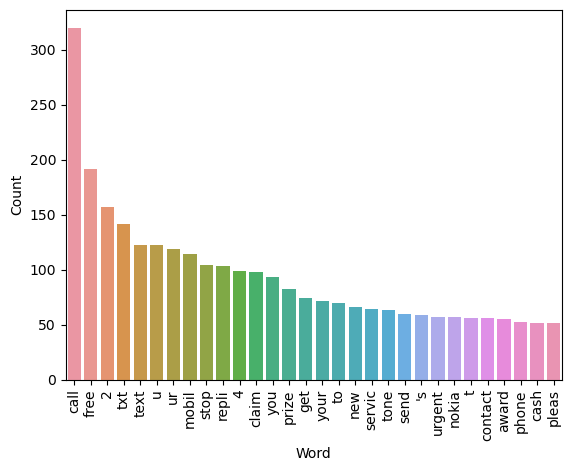

In [59]:
ham_counter = Counter(ham_corpus)
most_common_30 = ham_counter.most_common(30)
df2 = pd.DataFrame(most_common_30, columns = ['Word', 'Count'])

sns.barplot(x = 'Word', y = 'Count', data = df2)
plt.xticks(rotation = 'vertical')
plt.show()

In [60]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, .., avail, bugi, n,..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, ..., joke, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, ..., u, c, alreadi, ..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, i, n't, think, goe, usf, live, around, t..."


# MODEL BUILDING

In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [63]:
corpus = [' '.join(tokens) for tokens in df['transformed_text']]
x = tfidf.fit_transform(corpus).toarray()

In [64]:
x.shape

(5169, 3000)

In [66]:
y = df['target'].values

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [70]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [71]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [72]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[781 108]
 [ 24 121]]
0.5283842794759825


In [73]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.97678916827853
[[888   1]
 [ 23 122]]
0.991869918699187


In [74]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9796905222437138
[[886   3]
 [ 18 127]]
0.9769230769230769


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [76]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [77]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [78]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy,precision

In [79]:
train_classifier(svc, x_train, y_train, x_test, y_test)

(0.9796905222437138, 0.9626865671641791)

In [81]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9796905222437138
Precision -  0.9626865671641791
For  KN
Accuracy -  0.9110251450676983
Precision -  1.0
For  NB
Accuracy -  0.97678916827853
Precision -  0.991869918699187
For  DT
Accuracy -  0.9352030947775629
Precision -  0.7954545454545454
For  LR
Accuracy -  0.960348162475822
Precision -  0.9
For  RF
Accuracy -  0.9787234042553191
Precision -  1.0
For  AdaBoost
Accuracy -  0.9729206963249516
Precision -  0.927007299270073
For  BgC
Accuracy -  0.9738878143133463
Precision -  0.9338235294117647
For  ETC
Accuracy -  0.9825918762088974
Precision -  0.9922480620155039
For  GBDT
Accuracy -  0.9574468085106383
Precision -  0.9809523809523809
For  xgb
Accuracy -  0.9787234042553191
Precision -  0.9767441860465116


In [82]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision', ascending = False)

In [83]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.911025,1.000000
5,RF,0.978723,1.000000
8,ETC,0.982592,0.992248
2,NB,0.976789,0.991870
9,GBDT,0.957447,0.980952
10,xgb,0.978723,0.976744
0,SVC,0.979691,0.962687
7,BgC,0.973888,0.933824
6,AdaBoost,0.972921,0.927007
4,LR,0.960348,0.900000


In [84]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [85]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.911025
1,RF,Accuracy,0.978723
2,ETC,Accuracy,0.982592
3,NB,Accuracy,0.976789
4,GBDT,Accuracy,0.957447
5,xgb,Accuracy,0.978723
6,SVC,Accuracy,0.979691
7,BgC,Accuracy,0.973888
8,AdaBoost,Accuracy,0.972921
9,LR,Accuracy,0.960348


C:\Users\SMART\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


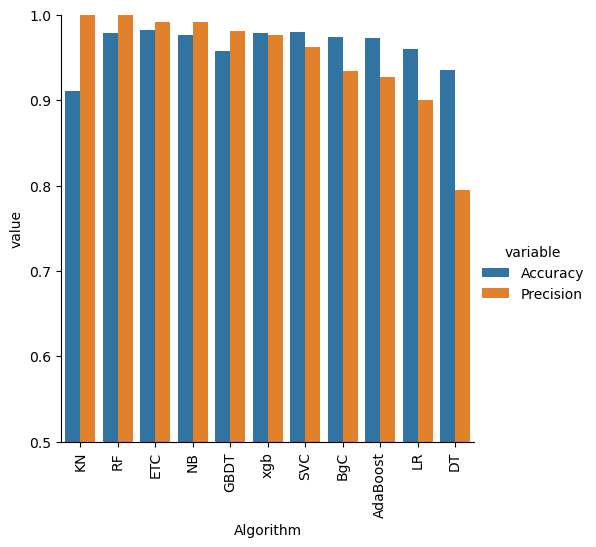

In [86]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df1, kind = 'bar', height = 5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [87]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_max_ft_3000':accuracy_scores, 'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000', ascending = False)

In [88]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_scaling':accuracy_scores, 'Precision_scaling':precision_scores}).sort_values('Precision_scaling', ascending = False)

In [89]:
new_df = performance_df.merge(temp_df, on = 'Algorithm')

In [90]:
new_df_scaled = new_df.merge(temp_df, on = 'Algorithm')

In [91]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_num_chars':accuracy_scores, 'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars', ascending = False)

In [92]:
new_df_scaled.merge(temp_df, on = 'Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.911025,1.000000,0.911025,1.000000,0.911025,1.000000,0.911025,1.000000
1,RF,0.978723,1.000000,0.978723,1.000000,0.978723,1.000000,0.978723,1.000000
2,ETC,0.982592,0.992248,0.982592,0.992248,0.982592,0.992248,0.982592,0.992248
3,NB,0.976789,0.991870,0.976789,0.991870,0.976789,0.991870,0.976789,0.991870
4,GBDT,0.957447,0.980952,0.957447,0.980952,0.957447,0.980952,0.957447,0.980952
5,xgb,0.978723,0.976744,0.978723,0.976744,0.978723,0.976744,0.978723,0.976744
6,SVC,0.979691,0.962687,0.979691,0.962687,0.979691,0.962687,0.979691,0.962687
7,BgC,0.973888,0.933824,0.973888,0.933824,0.973888,0.933824,0.973888,0.933824
8,AdaBoost,0.972921,0.927007,0.972921,0.927007,0.972921,0.927007,0.972921,0.927007
9,LR,0.960348,0.900000,0.960348,0.900000,0.960348,0.900000,0.960348,0.900000


In [94]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0, probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)

In [95]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [('svm',svc), ('nb',mnb), ('etc',etc)], voting = 'soft')

In [96]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [97]:
y_pred = voting.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Precision", precision_score(y_test,y_pred))

Accuracy 0.9854932301740812
Precision 1.0


In [98]:
estimators = [('svm',svc), ('nb',mnb), ('etc',etc)]
final_estimator = RandomForestClassifier()

In [99]:
from sklearn.ensemble import StackingClassifier

In [100]:
clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [101]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Precision", precision_score(y_test,y_pred))

Accuracy 0.9874274661508704
Precision 0.9782608695652174


In [102]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))